In [1]:
import os, re, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [2]:
clock0_05 = pd.read_csv("RIMEA_scenario4_basic_05ppm_20210425091020_clock0.txt",names=['v', 'finished', 't0', 't1'])
clock1_05 = pd.read_csv("RIMEA_scenario4_basic_05ppm_20210425091020_clock1.txt",names=['v', 'finished', 't0', 't1'])
clock2_05 = pd.read_csv("RIMEA_scenario4_basic_05ppm_20210425091020_clock2.txt",names=['v', 'finished', 't0', 't1'])

In [3]:
clock0_1 = pd.read_csv("RIMEA_scenario4_basic_1ppm_20210425102400_clock0.txt",names=['v', 'finished', 't0', 't1'])
clock1_1 = pd.read_csv("RIMEA_scenario4_basic_1ppm_20210425102400_clock1.txt",names=['v', 'finished', 't0', 't1'])
clock2_1 = pd.read_csv("RIMEA_scenario4_basic_1ppm_20210425102400_clock2.txt",names=['v', 'finished', 't0', 't1'])

In [4]:
clock0_2 = pd.read_csv("RIMEA_scenario4_basic_2ppm_20210425114336_clock0.txt",names=['v', 'finished', 't0', 't1'])
clock1_2 = pd.read_csv("RIMEA_scenario4_basic_2ppm_20210425114336_clock1.txt",names=['v', 'finished', 't0', 't1'])
clock2_2 = pd.read_csv("RIMEA_scenario4_basic_2ppm_20210425114336_clock2.txt",names=['v', 'finished', 't0', 't1'])

In [5]:
clock0_4 = pd.read_csv("RIMEA_scenario4_basic_4ppm_20210425145402_clock0.txt",names=['v', 'finished', 't0', 't1'])
clock1_4 = pd.read_csv("RIMEA_scenario4_basic_4ppm_20210425145402_clock1.txt",names=['v', 'finished', 't0', 't1'])
clock2_4 = pd.read_csv("RIMEA_scenario4_basic_4ppm_20210425145402_clock2.txt",names=['v', 'finished', 't0', 't1'])

## Define functions

In [6]:
def fundiag(df, dt):
    tmin = df.t0.min()
    tmax = df.t1.max()
    ts = np.arange(tmin,tmax,dt)
    rhos = []
    vs = []
    for t in ts:
        mask = ((df.t1 > t) & (df.t0 < t))
        density = mask.sum()/4
        speed = df[mask].v.mean()
        rhos.append(density)
        vs.append(speed)
        
    return pd.DataFrame({"t":ts,"v_mean":vs, "density":rhos})

def fundiagstd(df, dt):
    tmin = df.t0.min()
    tmax = df.t1.max()
    ts = np.arange(tmin+10,tmin+70,dt)
    rhos = []
    vs = []
    for t in ts:
        mask = ((df.t1 > t) & (df.t0 < t))
        density = mask.sum()/4
        speed = df[mask].v.mean()
        rhos.append(density)
        vs.append(speed)
        
    return pd.DataFrame({"t":ts,"v_mean":vs, "density":rhos})

def plotfds(fd, window):
    plt.figure()
    sns.lineplot(fd.t.rolling(window).mean(), fd.v_mean.rolling(window).mean())
    plt.xlabel("time [s]")
    plt.ylabel("speed [m/s]")
    plt.figure()
    sns.lineplot(fd.t.rolling(window).mean(), fd.density.rolling(window).mean())
    plt.xlabel("time [s]")
    plt.ylabel("density [passenger/m^2]")
    plt.figure()
    sns.scatterplot(fd.density, fd.v_mean)

def rhovsv(fd):
    rho = fd.density.unique()
    v = []
    for r in rho:
        v.append(fd[fd.density==r].v_mean.mean())
    return pd.Series(rho, name='density'), pd.Series(v, name='speed')

def WeidFD(rho):
    return 1.34*(1.-np.exp(-1.913*(1/rho-1/5.4)))


## Main measurements

### 0.5 ppm

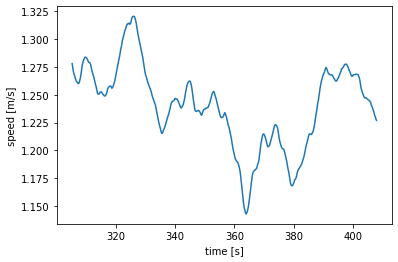

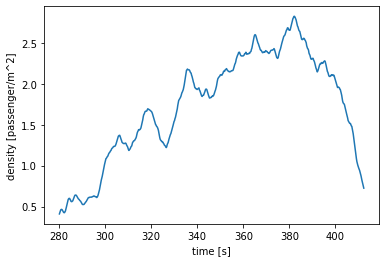

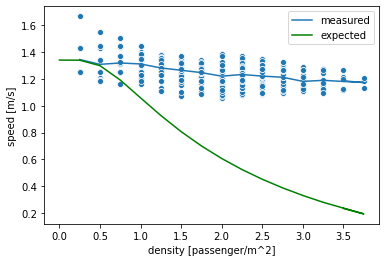

In [7]:
fd0_05= fundiag(clock0_05, 0.2)
plotfds(fd0_05, 50)
r, v = rhovsv(fd0_05)
plt.plot(r, v, label='measured')
plt.plot(r, WeidFD(r), 'g', label='expected')
plt.xlabel("density [passenger/m^2]")
plt.ylabel("speed [m/s]")
plt.legend()

### 1 ppm

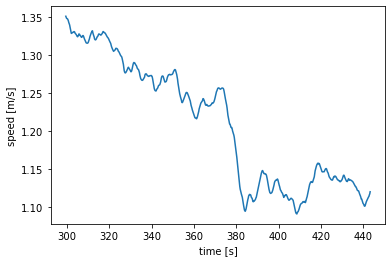

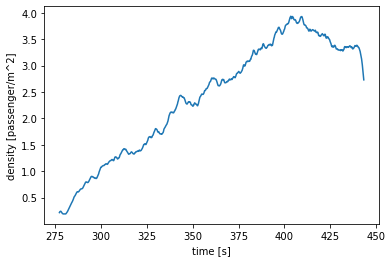

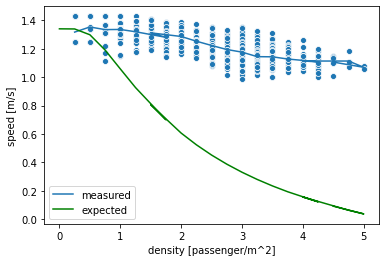

In [8]:
fd0_1= fundiag(clock0_1, 0.2)
plotfds(fd0_1, 50)
r, v = rhovsv(fd0_1)
plt.plot(r, v, label='measured')
plt.plot(r, WeidFD(r), 'g', label='expected')
plt.xlabel("density [passenger/m^2]")
plt.ylabel("speed [m/s]")
plt.legend()

### 2ppm

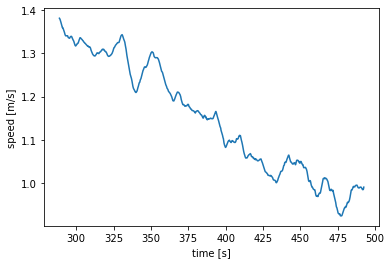

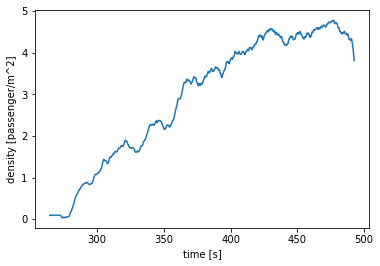

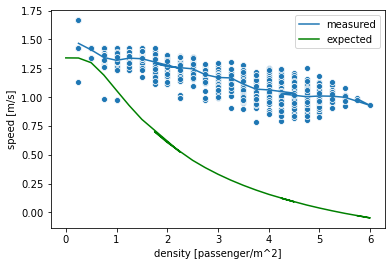

In [9]:
fd0_2= fundiag(clock0_2, 0.2)
plotfds(fd0_2, 50)
r, v = rhovsv(fd0_2)
plt.plot(r, v, label='measured')
plt.plot(r, WeidFD(r), 'g', label='expected')
plt.xlabel("density [passenger/m^2]")
plt.ylabel("speed [m/s]")
plt.legend()

### 4 ppm

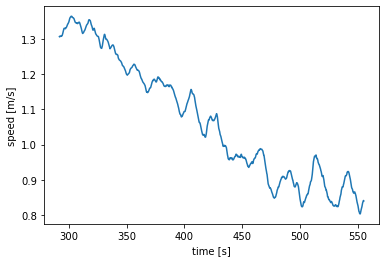

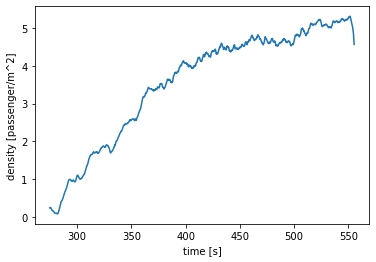

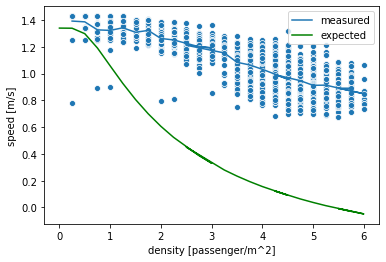

In [10]:
fd0_4= fundiag(clock0_4, 0.2)
plotfds(fd0_4, 50)
r, v = rhovsv(fd0_4)
plt.plot(r, v, label='measured')
plt.plot(r, WeidFD(r), 'g', label='expected')
plt.xlabel("density [passenger/m^2]")
plt.ylabel("speed [m/s]")
plt.legend()

## Extra measurements

### 1 ppm

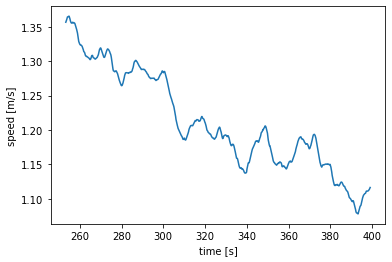

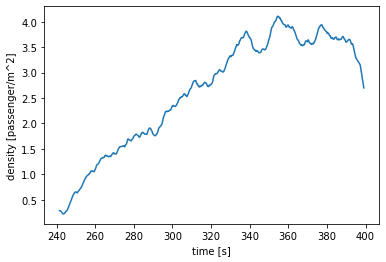

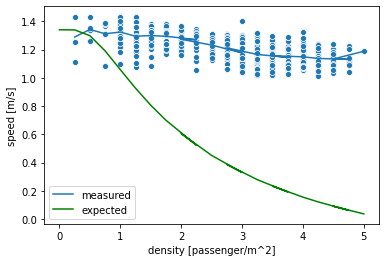

In [11]:
fd1_1= fundiag(clock1_1, 0.2)
plotfds(fd1_1, 50)
r, v = rhovsv(fd1_1)
plt.plot(r, v, label='measured')
plt.plot(r, WeidFD(r), 'g', label='expected')
plt.xlabel("density [passenger/m^2]")
plt.ylabel("speed [m/s]")
plt.legend()

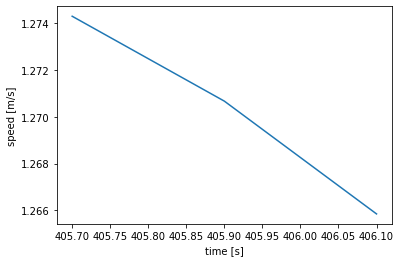

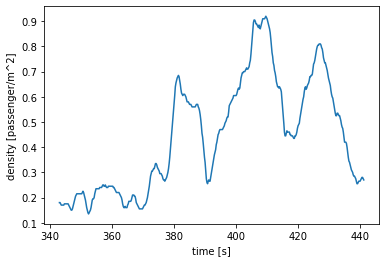

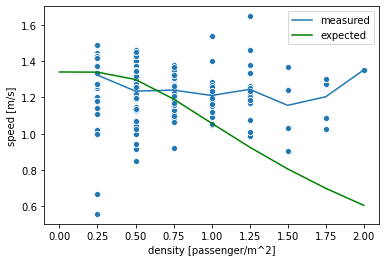

In [12]:
fd2_1= fundiag(clock2_1, 0.2)
plotfds(fd2_1, 50)
r, v = rhovsv(fd2_1)
plt.plot(r, v, label='measured')
plt.plot(r, WeidFD(r), 'g', label='expected')
plt.xlabel("density [passenger/m^2]")
plt.ylabel("speed [m/s]")
plt.legend()

### 4 ppm

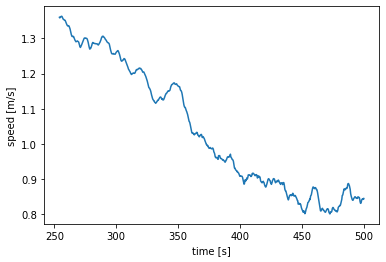

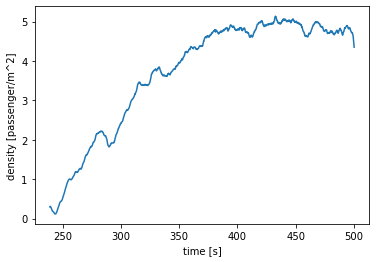

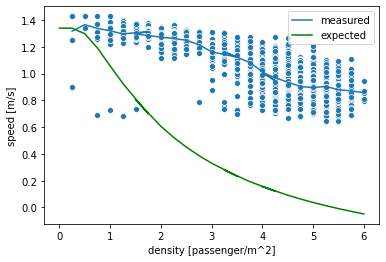

In [13]:
fd1_4= fundiag(clock1_4, 0.2)
plotfds(fd1_4, 50)
r, v = rhovsv(fd1_4)
plt.plot(r, v, label='measured')
plt.plot(r, WeidFD(r), 'g', label='expected')
plt.xlabel("density [passenger/m^2]")
plt.ylabel("speed [m/s]")
plt.legend()

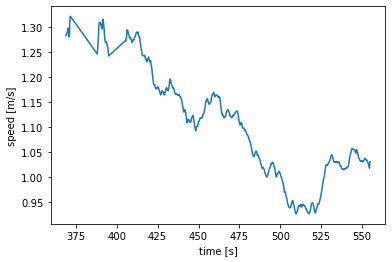

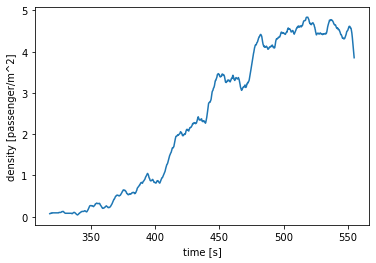

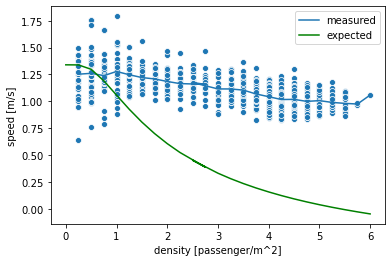

In [14]:
fd2_4= fundiag(clock2_4, 0.2)
plotfds(fd2_4, 50)
r, v = rhovsv(fd2_4)
plt.plot(r, v, label='measured')
plt.plot(r, WeidFD(r), 'g', label='expected')
plt.xlabel("density [passenger/m^2]")
plt.ylabel("speed [m/s]")
plt.legend()